In [1]:
#  pip install xgboost

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("car details v4.csv")
data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [4]:
data.duplicated().sum()

0

In [5]:
data.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [6]:
data.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

In [7]:
data.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')

In [8]:
data["Engine"].value_counts()

1197 cc    231
1248 cc    122
998 cc     121
1497 cc     84
1968 cc     82
          ... 
1948 cc      1
4806 cc      1
3496 cc      1
2609 cc      1
995 cc       1
Name: Engine, Length: 108, dtype: int64

In [9]:
data["Engine"]=data["Engine"].fillna("1197 cc")

In [10]:
data["Max Power"].value_counts()

89 bhp @ 4000 rpm     90
82 bhp @ 6000 rpm     62
83 bhp @ 6000 rpm     55
126 bhp @ 4000 rpm    55
74 bhp @ 4000 rpm     50
                      ..
204 bhp @ 3800 rpm     1
157 bhp @ 6500 rpm     1
255 bhp @ 3600 rpm     1
76 bhp @ 6000 rpm      1
329 bhp @ 5250 rpm     1
Name: Max Power, Length: 335, dtype: int64

In [11]:
data["Max Power"]=data["Max Power"].fillna("89 bhp @ 4000 rpm")

In [12]:
data["Max Torque"].value_counts()

200 Nm @ 1750 rpm    90
115 Nm @ 4000 rpm    78
114 Nm @ 4000 rpm    66
90 Nm @ 3500 rpm     64
400 Nm @ 1750 rpm    63
                     ..
505 Nm @ 4400 rpm     1
290@1800              1
380 Nm @ 2500 rpm     1
560 Nm @ 6500 rpm     1
480 Nm @ 1600 rpm     1
Name: Max Torque, Length: 290, dtype: int64

In [13]:
data["Max Torque"]=data["Max Torque"].fillna("200 Nm @ 1750 rpm")

In [14]:
data["Drivetrain"].value_counts()

FWD    1330
RWD     321
AWD     272
Name: Drivetrain, dtype: int64

In [15]:
data["Drivetrain"]=data["Drivetrain"].fillna("FWD ")

In [16]:
data["Length"]=data["Length"].fillna(data["Length"].mean())

In [17]:
data["Width"]=data["Width"].fillna(data["Width"].mean())

In [18]:
data["Height"]=data["Height"].fillna(data["Height"].mean())

In [19]:
data["Seating Capacity"]=data["Seating Capacity"].fillna(data["Seating Capacity"].mean())

In [20]:
data['Fuel Tank Capacity']=data['Fuel Tank Capacity'].fillna(data['Fuel Tank Capacity'].mean())

In [21]:
Make= LabelEncoder()
data["Make"]=Make.fit_transform(data["Make"])

Model= LabelEncoder()
data["Model"]=Model.fit_transform(data["Model"])

FuelType= LabelEncoder()
data["Fuel Type"]=FuelType.fit_transform(data["Fuel Type"])

Transmission= LabelEncoder()
data["Transmission"]=Transmission.fit_transform(data["Transmission"])

Location= LabelEncoder()
data["Location"]=Location.fit_transform(data["Location"])

Color= LabelEncoder()
data["Color"]=Color.fit_transform(data["Color"])

Owner= LabelEncoder()
data["Owner"]=Owner.fit_transform(data["Owner"])

SellerType= LabelEncoder()
data["Seller Type"]=SellerType.fit_transform(data["Seller Type"])

Engine= LabelEncoder()
data["Engine"]=Engine.fit_transform(data["Engine"])

MaxPower= LabelEncoder()
data["Max Power"]=MaxPower.fit_transform(data["Max Power"])

MaxTorque= LabelEncoder()
data["Max Torque"]=MaxTorque.fit_transform(data["Max Torque"])

Drivetrain= LabelEncoder()
data["Drivetrain"]=Drivetrain.fit_transform(data["Drivetrain"])



In [22]:
data.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x258e2460fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x258e2479640>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e2460af0>],
 'medians': [<matplotlib.lines.Line2D at 0x258e2479d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e2486130>],
 'means': []}

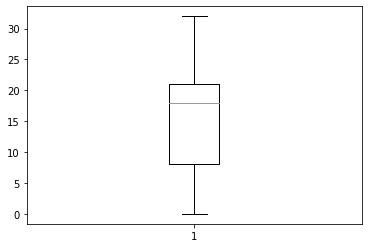

In [23]:
plt.boxplot(data['Make'])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e45add60>,
 'caps': [<matplotlib.lines.Line2D at 0x258e45bf4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e45ada30>],
 'medians': [<matplotlib.lines.Line2D at 0x258e45bfbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e45bff70>],
 'means': []}

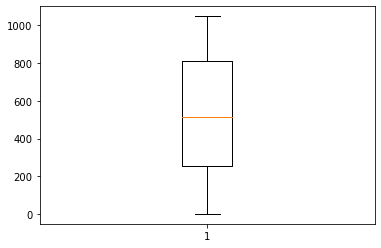

In [24]:
plt.boxplot(data['Model'])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e462c100>,
 'caps': [<matplotlib.lines.Line2D at 0x258e462c820>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e461dcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x258e462cf40>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e4637310>],
 'means': []}

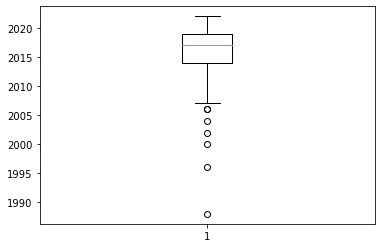

In [25]:
plt.boxplot(data['Year'])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e46969d0>,
 'caps': [<matplotlib.lines.Line2D at 0x258e46a3130>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e4696610>],
 'medians': [<matplotlib.lines.Line2D at 0x258e46a3850>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e46a3be0>],
 'means': []}

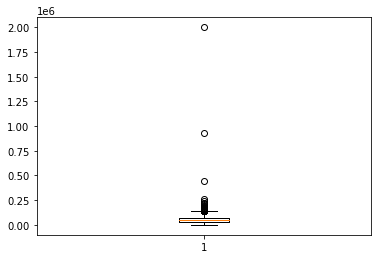

In [26]:
plt.boxplot(data['Kilometer'])

In [27]:
print(f'Old shape of data :{data.shape}')

Q1 =data.Kilometer.quantile(0.25)
Q3 = data.Kilometer.quantile(0.75)
IQR =Q3-Q1
print(Q1,Q3,IQR)
lower =Q1-1.5*IQR
upper =Q3+1.5*IQR

upper_index = np.where(data['Kilometer']>=upper)[0]
lower_index = np.where(data['Kilometer']<=lower)[0]

data.drop(index=upper_index,inplace=True)
data.drop(index=lower_index,inplace=True)

print(f'New shape of data: {data.shape}')

Old shape of data :(2059, 20)
29000.0 72000.0 43000.0
New shape of data: (2023, 20)


In [28]:
data.reset_index(inplace=True)

In [29]:
data.drop('index', axis=1, inplace=True)

In [30]:
data.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,7,106,505000,2017,87150,6,1,56,7,1,1,7,312,5,1,3990.0,1680.0,1505.0,5.0,35.0
1,19,802,450000,2014,75000,2,1,40,15,3,2,9,289,77,1,3995.0,1695.0,1555.0,5.0,42.0
2,8,1030,220000,2011,67000,6,1,39,8,1,2,6,301,11,1,3585.0,1595.0,1550.0,5.0,35.0
3,30,492,799000,2019,37500,6,1,41,13,1,2,6,305,15,1,3995.0,1745.0,1510.0,5.0,37.0
4,30,548,1950000,2018,69000,2,1,45,7,1,2,60,78,167,3,4735.0,1830.0,1795.0,7.0,55.0


{'whiskers': [<matplotlib.lines.Line2D at 0x258e472aaf0>,
 'caps': [<matplotlib.lines.Line2D at 0x258e4739130>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e472a760>],
 'medians': [<matplotlib.lines.Line2D at 0x258e4739850>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e4739be0>],
 'means': []}

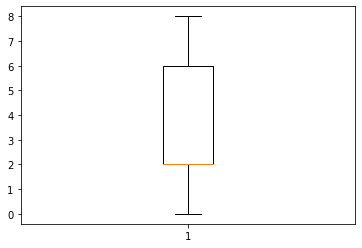

In [31]:
plt.boxplot(data['Fuel Type'])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e4797ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x258e47a3220>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e47976d0>],
 'medians': [<matplotlib.lines.Line2D at 0x258e47a38e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e47a3c70>],
 'means': []}

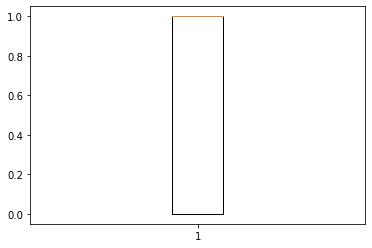

In [32]:
plt.boxplot(data['Transmission'])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e4804730>,
 'caps': [<matplotlib.lines.Line2D at 0x258e4804e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e48043a0>],
 'medians': [<matplotlib.lines.Line2D at 0x258e480f5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e480f970>],
 'means': []}

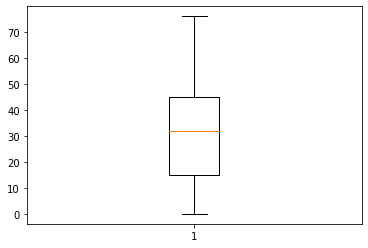

In [33]:
plt.boxplot(data['Location'])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e4863ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x258e4870640>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e4863b50>],
 'medians': [<matplotlib.lines.Line2D at 0x258e4870d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e487f160>],
 'means': []}

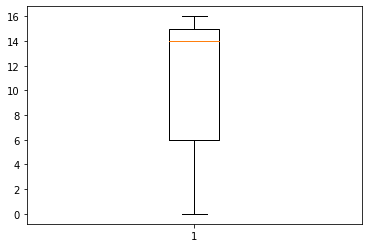

In [34]:
plt.boxplot(data['Color'])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e58a4fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x258e58b4730>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e58a4ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x258e58b4e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e58c0220>],
 'means': []}

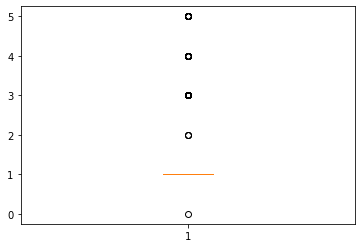

In [35]:
plt.boxplot(data['Owner'])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e590ed30>,
 'caps': [<matplotlib.lines.Line2D at 0x258e591d430>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e590e940>],
 'medians': [<matplotlib.lines.Line2D at 0x258e591db50>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e591dee0>],
 'means': []}

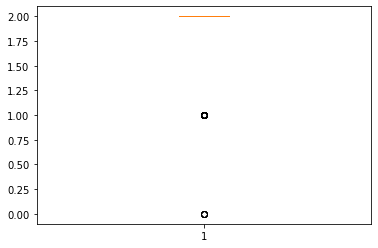

In [36]:
plt.boxplot(data['Seller Type'])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e597fc10>,
 'caps': [<matplotlib.lines.Line2D at 0x258e598f370>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e597f880>],
 'medians': [<matplotlib.lines.Line2D at 0x258e598fa90>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e598fe20>],
 'means': []}

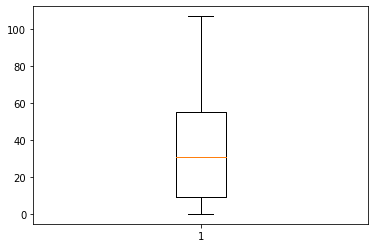

In [37]:
plt.boxplot(data['Engine'])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e59ec940>,
 'caps': [<matplotlib.lines.Line2D at 0x258e59fa0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e59ec5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x258e59fa7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e59fab50>],
 'means': []}

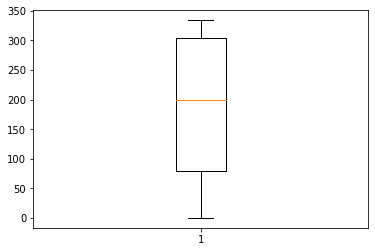

In [38]:
plt.boxplot(data['Max Power'])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e5a60220>,
 'caps': [<matplotlib.lines.Line2D at 0x258e5a60970>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e5a52e20>],
 'medians': [<matplotlib.lines.Line2D at 0x258e5a6e0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e5a6e460>],
 'means': []}

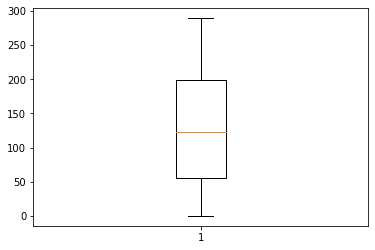

In [39]:
plt.boxplot(data['Max Torque'])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e5aca520>,
 'caps': [<matplotlib.lines.Line2D at 0x258e5acac40>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e5aca130>],
 'medians': [<matplotlib.lines.Line2D at 0x258e5ad7340>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e5ad76d0>],
 'means': []}

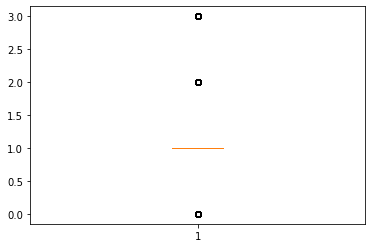

In [40]:
plt.boxplot(data['Drivetrain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e5b33730>,
 'caps': [<matplotlib.lines.Line2D at 0x258e5b33e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e5b33370>],
 'medians': [<matplotlib.lines.Line2D at 0x258e5b3f5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e5b3f940>],
 'means': []}

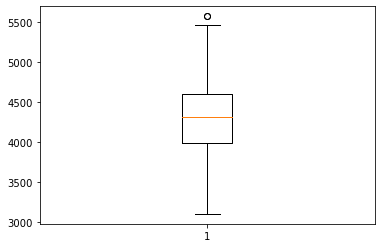

In [41]:
plt.boxplot(data["Length"])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e5b9f490>,
 'caps': [<matplotlib.lines.Line2D at 0x258e5b9fbe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e5b9f0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x258e5ba9340>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e5ba96d0>],
 'means': []}

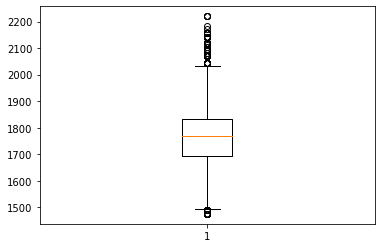

In [42]:
plt.boxplot(data["Width"])

In [43]:
print(f'Old shape of data :{data.shape}')

Q1 =data.Width.quantile(0.25)
Q3 = data.Width.quantile(0.75)
IQR =Q3-Q1
print(Q1,Q3,IQR)
lower =Q1-1.5*IQR
upper =Q3+1.5*IQR

upper_index = np.where(data['Width']>=upper)[0]
lower_index = np.where(data['Width']<=lower)[0]

data.drop(index=upper_index,inplace=True)
data.drop(index=lower_index,inplace=True)

print(f'New shape of data: {data.shape}')

Old shape of data :(2023, 20)
1695.0 1831.0 136.0
New shape of data: (1842, 20)


In [44]:
data.reset_index(inplace=True)

In [45]:
data.drop('index', axis=1, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x258e5c0d370>,
 'caps': [<matplotlib.lines.Line2D at 0x258e5c0da90>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e5c00f40>],
 'medians': [<matplotlib.lines.Line2D at 0x258e5c1a1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e5c1a580>],
 'means': []}

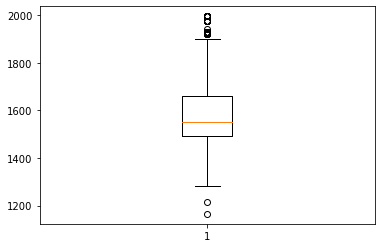

In [46]:
plt.boxplot(data["Height"])

In [47]:
print(f'Old shape of data :{data.shape}')

Q1 =data.Height.quantile(0.25)
Q3 = data.Height.quantile(0.75)
IQR =Q3-Q1
print(Q1,Q3,IQR)
lower =Q1-1.5*IQR
upper =Q3+1.5*IQR

upper_index = np.where(data['Height']>=upper)[0]
lower_index = np.where(data['Height']<=lower)[0]

data.drop(index=upper_index,inplace=True)
data.drop(index=lower_index,inplace=True)

print(f'New shape of data: {data.shape}')

Old shape of data :(1842, 20)
1494.0 1659.0 165.0
New shape of data: (1795, 20)


In [48]:
data.reset_index(inplace=True)

In [49]:
data.drop('index', axis=1, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x258e5c773d0>,
 'caps': [<matplotlib.lines.Line2D at 0x258e5c77af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e5c69fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x258e5c7f250>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e5c7f5e0>],
 'means': []}

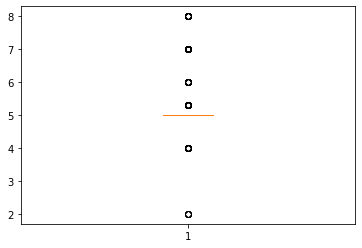

In [50]:
plt.boxplot(data["Seating Capacity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x258e5ce0670>,
 'caps': [<matplotlib.lines.Line2D at 0x258e5ce0d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x258e5ce02b0>],
 'medians': [<matplotlib.lines.Line2D at 0x258e5ceb4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x258e5ceb880>],
 'means': []}

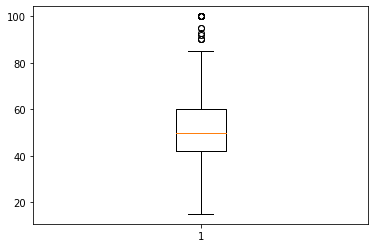

In [51]:
plt.boxplot(data["Fuel Tank Capacity"])

In [52]:
print(f'Old shape of data :{data.shape}')

Q1 =data['Fuel Tank Capacity'].quantile(0.25)
Q3 = data['Fuel Tank Capacity'].quantile(0.75)
IQR =Q3-Q1
print(Q1,Q3,IQR)
lower =Q1-1.5*IQR
upper =Q3+1.5*IQR

upper_index = np.where(data['Fuel Tank Capacity']>=upper)[0]
lower_index = np.where(data['Fuel Tank Capacity']<=lower)[0]

data.drop(index=upper_index,inplace=True)
data.drop(index=lower_index,inplace=True)

print(f'New shape of data: {data.shape}')

Old shape of data :(1795, 20)
42.0 60.0 18.0
New shape of data: (1772, 20)


In [53]:
data.reset_index(inplace=True)

In [54]:
data.drop('index', axis=1, inplace=True)

In [55]:
data.shape

(1772, 20)

In [56]:
correlation = data.corr()
correlation

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
Make,1.000000,0.181838,-0.015470,0.059386,0.026307,-0.010786,0.093944,0.028467,0.011354,0.006720,-0.048179,0.086187,-0.029107,-0.007844,0.196424,-0.002762,-0.026665,0.190423,0.208140,0.036998
Model,0.181838,1.000000,-0.105256,-0.046515,0.055961,-0.056135,0.219042,-0.018523,0.035245,-0.011043,-0.028423,-0.019417,0.084062,0.010828,-0.226070,-0.234354,-0.105128,0.317725,0.089084,-0.083605
Price,-0.015470,-0.105256,1.000000,0.329765,-0.293144,-0.127892,-0.489021,-0.092345,-0.112813,0.064677,-0.097971,0.300454,-0.162277,0.393138,0.161056,0.599979,0.569090,0.060703,0.010388,0.559048
Year,0.059386,-0.046515,0.329765,1.000000,-0.568682,-0.008587,-0.164528,-0.059424,-0.061384,-0.276696,-0.036491,0.115683,-0.157049,0.070830,-0.083535,0.088125,0.206518,0.144335,0.009373,0.053952
Kilometer,0.026307,0.055961,-0.293144,-0.568682,1.000000,-0.288744,0.179111,0.002421,0.067615,0.191998,0.034171,-0.054279,0.040180,-0.009048,0.037986,0.038174,-0.018248,0.087912,0.184278,0.069502
Fuel Type,-0.010786,-0.056135,-0.127892,-0.008587,-0.288744,1.000000,0.063345,0.063038,-0.036138,-0.053180,-0.014933,-0.126939,0.107826,-0.402916,-0.090730,-0.304559,-0.352984,-0.318168,-0.288543,-0.404841
Transmission,0.093944,0.219042,-0.489021,-0.164528,0.179111,0.063345,1.000000,0.058040,0.129855,-0.076089,0.069607,-0.236985,0.311805,-0.307403,-0.102055,-0.501497,-0.481548,0.042612,-0.000086,-0.467208
Location,0.028467,-0.018523,-0.092345,-0.059424,0.002421,0.063038,0.058040,1.000000,-0.012467,-0.037280,-0.093461,-0.038805,0.090924,-0.070259,0.015087,-0.060167,-0.082577,-0.026558,0.005695,-0.089324
Color,0.011354,0.035245,-0.112813,-0.061384,0.067615,-0.036138,0.129855,-0.012467,1.000000,-0.009077,0.012436,-0.056800,0.083710,-0.034208,0.021205,-0.130574,-0.122522,-0.012409,0.009006,-0.086116
Owner,0.006720,-0.011043,0.064677,-0.276696,0.191998,-0.053180,-0.076089,-0.037280,-0.009077,1.000000,0.053863,0.036648,-0.004261,0.089412,0.056921,0.091017,0.052992,-0.007985,0.024100,0.095345


### Train Test Split

In [57]:
x=data.drop('Price',axis =1)
y=data['Price']

In [58]:
x

,Make,Model,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,7,106,2017,87150,6,1,56,7,1,1,7,312,5,1,3990.0,1680.0,1505.0,5.0,35.00000
1,19,802,2014,75000,2,1,40,15,3,2,9,289,77,1,3995.0,1695.0,1555.0,5.0,42.00000
2,8,1030,2011,67000,6,1,39,8,1,2,6,301,11,1,3585.0,1595.0,1550.0,5.0,35.00000
3,30,492,2019,37500,6,1,41,13,1,2,6,305,15,1,3995.0,1745.0,1510.0,5.0,37.00000
4,30,548,2018,69000,2,1,45,7,1,2,60,78,167,3,4735.0,1830.0,1795.0,7.0,55.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,18,999,2016,90300,2,1,67,15,1,2,55,66,162,1,4585.0,1890.0,1785.0,7.0,70.00000
1768,8,414,2014,83000,6,1,1,15,3,2,103,247,264,1,3495.0,1550.0,1500.0,5.0,32.00000
1769,6,455,2013,73000,6,1,68,14,1,2,5,283,1,1,3795.0,1680.0,1427.0,5.0,45.00000
1770,1,13,2018,60474,2,0,12,15,1,2,47,144,199,3,4936.0,1868.0,1479.0,5.0,65.00000


In [59]:
y

0        505000
1        450000
2        220000
3        799000
4       1950000
         ...   
1767     850000
1768     275000
1769     240000
1770    4290000
1771     670000
Name: Price, Length: 1772, dtype: int64

In [60]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=12)

In [61]:
x_train.shape ,x_test.shape

((1417, 19), (355, 19))

### Linear Regression

In [62]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [63]:
model1.coef_  

array([ 4.37715049e+02,  5.02773916e+02,  1.15509167e+05, -1.15596764e+01,
        1.01260319e+05, -2.69194709e+05, -3.66074156e+03, -3.12044630e+03,
        2.05901170e+05, -5.93686771e+05,  5.48183014e+03,  4.68806080e+03,
        4.72455165e+03,  1.17966928e+05,  2.42470235e+03,  3.13548009e+03,
       -5.02883578e+01, -5.07071987e+05,  1.76639303e+04])

In [64]:
model1.intercept_

-246091602.3967902

In [65]:
model1.score(x_test,y_test)

0.6032835416960316

In [66]:
model1.score(x_train,y_train)

0.6393726913108648

In [67]:
y_pred = model1.predict(x_test)

In [68]:
pd.DataFrame({'True values':y_test, 'Predicted values':y_pred})

,True values,Predicted values
1074,545000,4.956245e+05
326,275000,-1.322240e+06
274,195000,-1.826496e+05
1431,1399000,1.694624e+06
226,395000,6.045525e+05
...,...,...
595,2200000,2.323493e+06
1537,1450000,1.331250e+06
1571,475000,1.683592e+05
1224,1199000,1.456888e+06


In [69]:
mean_absolute_error(y_test,y_pred)

699653.3142614458

In [70]:
mean_squared_error(y_test,y_pred)

1240541257843.119

### Decision Tree Regression

In [71]:
model2=DecisionTreeRegressor()
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [72]:
model2.get_depth()

23

In [73]:
print("Train Score",model2.score(x_train,y_train))
y_pred2=model2.predict(x_test)
print("Error",mean_squared_error(y_test,y_pred2))

Train Score 0.9997601289472988
Error 570612748191.6536


In [74]:
model3=DecisionTreeRegressor(max_depth=5)
model3.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [75]:
print("Test Score",model3.score(x_test,y_test))
print("Train Score",model3.score(x_train,y_train))
ypred3=model3.predict(x_test)
print("Ërror",mean_squared_error(y_test,ypred3))

Test Score 0.7294000024201998
Train Score 0.88660121334913
Ërror 846172258154.1616


### Random Forest

In [76]:
model4=RandomForestRegressor(random_state=10)
model4.fit(x_train,y_train)
print("train score: ",model4.score(x_train,y_train))
print("test score: ",model4.score(x_test,y_test))

train score:  0.9805133878385064
test score:  0.8833972618969698


In [77]:
model5 =RandomForestRegressor(n_estimators=50,random_state=11) 
model5.fit(x_train,y_train)
print("train score: ",model5.score(x_train,y_train))
print("test score: ",model5.score(x_test,y_test))

train score:  0.9791289215374158
test score:  0.8907566230532065


### KNN

In [78]:
# pip install --upgrade threadpoolctl

In [79]:
model6=KNeighborsRegressor(n_neighbors=4)
model6.fit(x_train,y_train)
print("train score: ",model6.score(x_train,y_train))
print("test score: ",model6.score(x_test,y_test))

train score:  0.6563949006695138
test score:  0.3750967263932532


In [80]:
model7=KNeighborsRegressor(n_neighbors=10)
model7.fit(x_train,y_train)
print("train score: ",model7.score(x_train,y_train))
print("test score: ",model7.score(x_test,y_test))

train score:  0.49371226622629516
test score:  0.29683584491362924


### SVM

In [81]:
model8=SVR()
model8.fit(x_train,y_train)
print("train score: ",model8.score(x_train,y_train))
print("test score: ",model8.score(x_test,y_test))

train score:  -0.140273783184649
test score:  -0.09966172325162304


### Boosting algorithms

In [82]:
model9=AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6),learning_rate=0.6)
model9.fit(x_train,y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=6),
                  learning_rate=0.6)

In [83]:
model9.score(x_train,y_train)

0.9795940588017499

In [84]:
model9.score(x_test,y_test)

0.8745156003821786

In [85]:
model10=GradientBoostingRegressor()
model10.fit(x_train,y_train)

GradientBoostingRegressor()

In [86]:
model10.score(x_train,y_train)

0.9735475909728756

In [87]:
model10.score(x_test,y_test)

0.8949242868895727

In [88]:
model11= GradientBoostingRegressor(max_depth=6, learning_rate=0.6)
model11.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.6, max_depth=6)

In [89]:
model11.score(x_train,y_train)

0.9997555474091175

In [90]:
model11.score(x_test,y_test)

0.8872852209338518

In [91]:
model12=XGBRegressor()
model12.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
model12.score(x_train,y_train)

0.9995026547560859

In [93]:
model12.score(x_test,y_test)

0.9258899708016073

### Model score comparison

In [94]:
model=['Linear Regressor','Decision Tree','Random Forest','KNN','SVM','Adaboost','GradientBoost','XGB']

In [95]:
score=[model1.score(x_test,y_test),model3.score(x_test,y_test),model4.score(x_test,y_test),model6.score(x_test,y_test),model8.score(x_test,y_test),model9.score(x_test,y_test),model10.score(x_test,y_test),model11.score(x_test,y_test)]

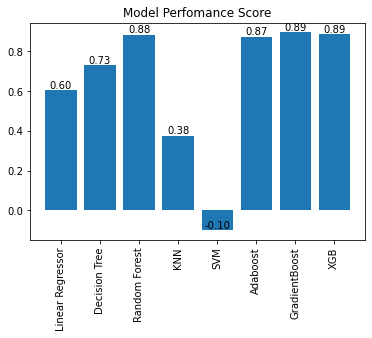

In [96]:
# plt.figure(figsize=(10, 6))
# bars = plt.bar(model, score, color='green')

plt.bar(model,score)

plt.title('Model Perfomance Score')
plt.xticks(rotation=90)
for i,score in enumerate(score):
    plt.text(i,score,f'{score:.2f}',ha ='center',va='bottom')

### Optimization

In [97]:
gsvc =GridSearchCV(model12,
                   {'n_estimators':[10,15,20,30,40,50,60,70,80,90,100],'learning_rate':[0.3,0.4,0.5,0.6,0.7],
                   'max_depth':[4,5,6,7]},cv=5)

In [98]:
gsvc.fit(x,y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.3, 0.4, 0.5, 0.6, 0.7],
                         'max_depth': [4, 5, 6, 7],
                         'n_estimators': [10, 15, 20, 30, 40, 50, 60, 70, 80,
                                          90, 100]})

In [99]:
gsvc.best_params_

{'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100}

In [100]:
gsvc.best_score_

0.8719291872316812